In [ ]:
import pandas as pd
df = pd.read_csv("merged_network_metrics.csv")
df.head()

,Nodes,Packets Sent,Packets Received,Packet Loss,Packet Delivery Ratio,Avg Delay,Throughput,Avg Jitter
0,45,5087894,3203581,1884313,62.9648,0.000064,131220000.0,0.000028
1,18,1223447,647769,575678,52.9462,0.000059,26533300.0,0.000139
2,39,5132637,3131821,2000816,61.0178,0.000044,128280000.0,0.000029
3,59,5593838,3808303,1785535,68.0803,0.000115,155990000.0,0.000024
4,35,7098560,3865740,3232820,54.4581,0.000019,158341000.0,0.000023


In [ ]:
df["Packet Loss (%)"] = (df["Packet Loss"] / df["Packets Sent"]) * 100
df.head()

,Nodes,Packets Sent,Packets Received,Packet Loss,Packet Delivery Ratio,Avg Delay,Throughput,Avg Jitter,Packet Loss (%)
0,45,5087894,3203581,1884313,62.9648,0.000064,131220000.0,0.000028,37.035225
1,18,1223447,647769,575678,52.9462,0.000059,26533300.0,0.000139,47.053775
2,39,5132637,3131821,2000816,61.0178,0.000044,128280000.0,0.000029,38.982223
3,59,5593838,3808303,1785535,68.0803,0.000115,155990000.0,0.000024,31.919677
4,35,7098560,3865740,3232820,54.4581,0.000019,158341000.0,0.000023,45.541913


In [ ]:
def congestion_level(loss):
    if loss >= 50:
        return "High"
    elif loss >= 30:
        return "Moderate"
    else:
        return "Low"

In [ ]:
df["Congestion"] = df["Packet Loss (%)"].apply(congestion_level)
df.head(10)

,Nodes,Packets Sent,Packets Received,Packet Loss,Packet Delivery Ratio,Avg Delay,Throughput,Avg Jitter,Packet Loss (%),Congestion
0,45,5087894,3203581,1884313,62.9648,0.000064,131220000.0,0.000028,37.035225,Moderate
1,18,1223447,647769,575678,52.9462,0.000059,26533300.0,0.000139,47.053775,Moderate
2,39,5132637,3131821,2000816,61.0178,0.000044,128280000.0,0.000029,38.982223,Moderate
3,59,5593838,3808303,1785535,68.0803,0.000115,155990000.0,0.000024,31.919677,Moderate
4,35,7098560,3865740,3232820,54.4581,0.000019,158341000.0,0.000023,45.541913,Moderate
5,48,7609399,4609281,3000118,60.5735,0.000058,188797000.0,0.000020,39.426478,Moderate
6,52,3043533,2213780,829753,72.7372,0.000162,90677000.0,0.000041,27.262823,Low
7,33,1993348,1205627,787721,60.4825,0.000088,49383800.0,0.000075,39.517485,Moderate
8,17,1081431,583490,497941,53.9554,0.000068,23900300.0,0.000154,46.044639,Moderate
9,23,510831,319031,191800,62.4533,0.000297,13067500.0,0.000282,37.546664,Moderate


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
numeric_cols = ["Packets Sent", "Packets Received", "Packet Loss", "Packet Delivery Ratio",
                "Avg Delay", "Throughput", "Avg Jitter"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.head()

,Nodes,Packets Sent,Packets Received,Packet Loss,Packet Delivery Ratio,Avg Delay,Throughput,Avg Jitter,Packet Loss (%),Congestion
0,45,5087894,3203581,1884313,62.9648,0.000064,131220000.0,0.000028,37.035225,Moderate
1,18,1223447,647769,575678,52.9462,0.000059,26533300.0,0.000139,47.053775,Moderate
2,39,5132637,3131821,2000816,61.0178,0.000044,128280000.0,0.000029,38.982223,Moderate
3,59,5593838,3808303,1785535,68.0803,0.000115,155990000.0,0.000024,31.919677,Moderate
4,35,7098560,3865740,3232820,54.4581,0.000019,158341000.0,0.000023,45.541913,Moderate


In [ ]:
scaler = MinMaxScaler()
df[["Avg Delay", "Throughput", "Avg Jitter"]] = scaler.fit_transform(df[["Avg Delay", "Throughput", "Avg Jitter"]])
df.head()
df.size

9590

In [ ]:
df.head()

,Nodes,Packets Sent,Packets Received,Packet Loss,Packet Delivery Ratio,Avg Delay,Throughput,Avg Jitter,Packet Loss (%),Congestion
0,45,5087894,3203581,1884313,62.9648,0.098702,0.429482,0.028527,37.035225,Moderate
1,18,1223447,647769,575678,52.9462,0.089227,0.068809,0.230268,47.053775,Moderate
2,39,5132637,3131821,2000816,61.0178,0.059099,0.419353,0.029699,38.982223,Moderate
3,59,5593838,3808303,1785535,68.0803,0.198497,0.514821,0.020408,31.919677,Moderate
4,35,7098560,3865740,3232820,54.4581,0.011808,0.522921,0.019769,45.541913,Moderate


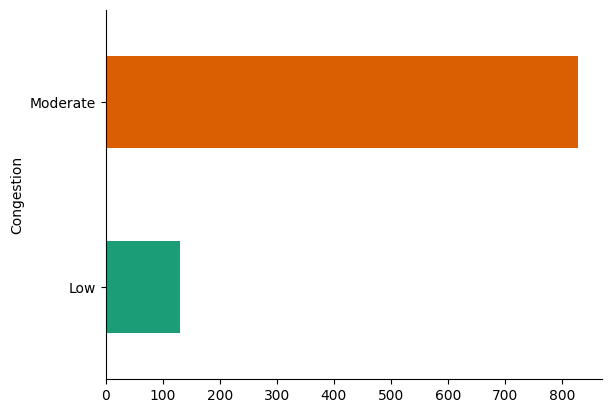

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Congestion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

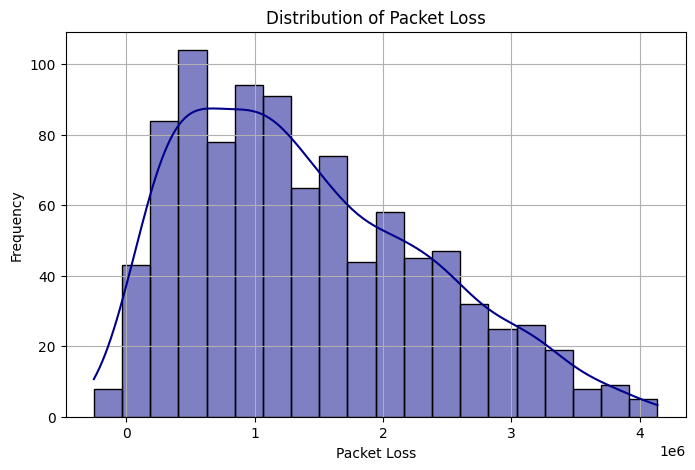

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Packet Loss'], bins=20, kde=True, color='darkblue')
plt.title('Distribution of Packet Loss')
plt.xlabel('Packet Loss')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

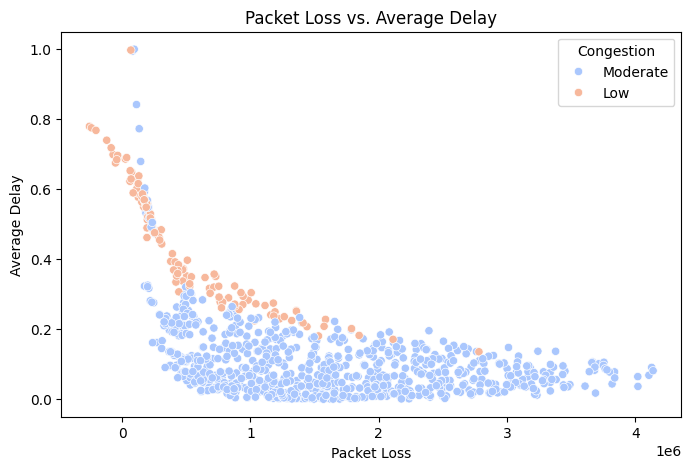

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Packet Loss'], y=df['Avg Delay'], hue=df['Congestion'], palette='coolwarm')
plt.title('Packet Loss vs. Average Delay')
plt.xlabel('Packet Loss')
plt.ylabel('Average Delay')
plt.show()

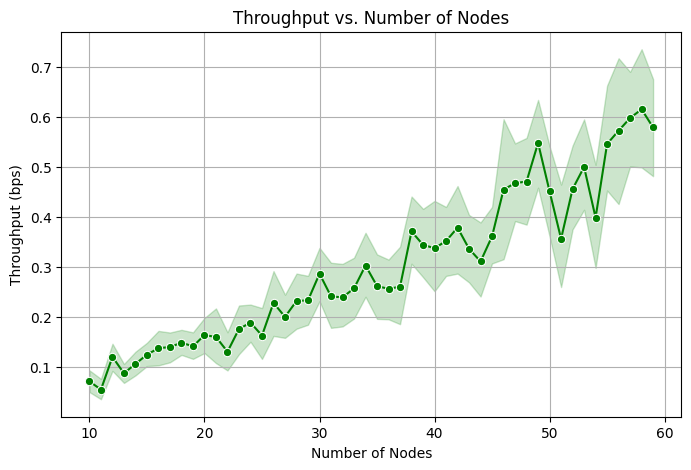

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=df['Nodes'], y=df['Throughput'], marker='o', color='green')
plt.title('Throughput vs. Number of Nodes')
plt.xlabel('Number of Nodes')
plt.ylabel('Throughput (bps)')
plt.grid(True)
plt.show()

<ipython-input-14-8a4978ab7e42>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Congestion'], y=df['Packet Delivery Ratio'], palette='Set2')


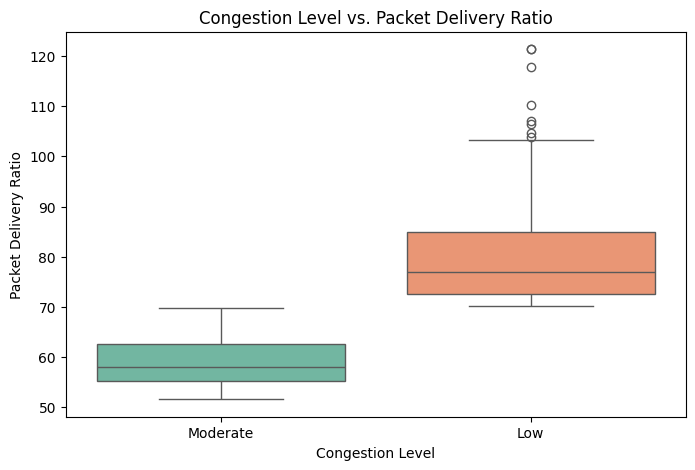

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Congestion'], y=df['Packet Delivery Ratio'], palette='Set2')
plt.title('Congestion Level vs. Packet Delivery Ratio')
plt.xlabel('Congestion Level')
plt.ylabel('Packet Delivery Ratio')
plt.show()


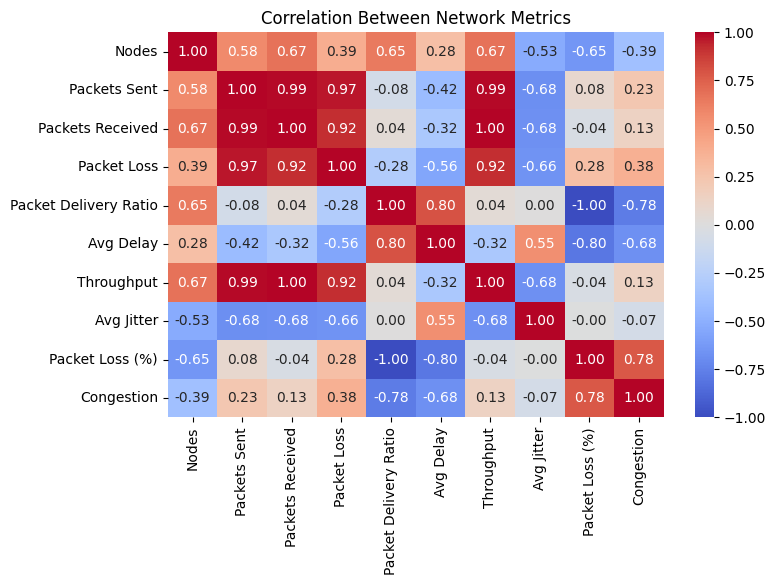

In [ ]:

congestion_mapping = {'Low': 0, 'Moderate': 1, 'High': 2}
df['Congestion'] = df['Congestion'].map(congestion_mapping)

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Network Metrics')
plt.show()
